In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, root_mean_squared_error

In [2]:
df = pd.read_excel("Desktop/Inflation rate and EXIM.xlsx")

In [3]:
df.head()

,Year,Months,Inflation Rate (%),Exchange Rate (USD),Exports (₹),Imports (₹)
0,2014,April,8.48,60.315227,15712253.54,21605029.91
1,2014,May,8.33,59.264227,16603474.00,23163853.43
2,2014,June,6.77,59.659190,15472853.80,22908150.73
3,2014,July,7.39,60.015000,15490724.92,24064282.66
4,2014,August,7.03,60.815572,16322033.06,22819125.32


In [4]:
Table_42 = df[["Inflation Rate (%)","Exchange Rate (USD)","Exports (₹)","Imports (₹)"]].describe()

In [6]:
Styled = Table_42.style.format(precision=4).set_properties(**{
    'background-color': 'lightblue',
    'color': 'black',
    'border': '1px solid black',
    'text-align': 'center'
})
Styled

,Inflation Rate (%),Exchange Rate (USD),Exports (₹),Imports (₹)
count,118.0000,118.0000,118.0000,118.0000
mean,5.0623,71.0062,20567500.9572,30773806.7681
std,1.4924,6.7997,6103542.9991,10194860.5492
min,1.4600,59.2642,12933110.8100,16147643.5000
25%,4.0875,65.2070,15516211.8325,22924190.5800
50%,5.0400,70.8020,18425599.5750,27311429.1000
75%,6.0550,74.8748,25931776.8400,39409251.1975
max,8.4800,83.2980,34603976.1700,53155934.8600


In [11]:
a,e = stats.pearsonr(df['Inflation Rate (%)'],df["Exports (₹)"])
print(a,e)
e = max(e, 1e-4)

0.3178522681438957 0.0004524744727392305


In [13]:
b,f = stats.pearsonr(df['Inflation Rate (%)'],df["Imports (₹)"])
print(b,f)
f = max(f, 1e-4)

0.24290482690386658 0.008040819809611995


In [15]:
c,g = stats.pearsonr(df['Exchange Rate (USD)'],df["Exports (₹)"])
print(c,g)
g = max(g, 1e-4)

0.8687724460363903 3.345073217373926e-37


In [17]:
d,h = stats.pearsonr(df['Exchange Rate (USD)'],df["Imports (₹)"])
print(d,h)
h = max(h, 1e-4)

0.8451754398361899 2.405827621395629e-33


In [19]:
Q = {"Variables":["Inflation Rate and Exports", "Inflation Rate and Imports", "Exchange Rate and Exports", 
                  "Exchange Rate and Imports"], "Correlation Coefficient":[a,b,c,d],
     "P-Value":[e,f,g,h], "Significance":["Is Significant","Is Significant","Is Significant","Is Significant"]}
Q

{'Variables': ['Inflation Rate and Exports',
  'Inflation Rate and Imports',
  'Exchange Rate and Exports',
  'Exchange Rate and Imports'],
 'Correlation Coefficient': [0.3178522681438957,
  0.24290482690386658,
  0.8687724460363903,
  0.8451754398361899],
 'P-Value': [0.0004524744727392305, 0.008040819809611995, 0.0001, 0.0001],
 'Significance': ['Is Significant',
  'Is Significant',
  'Is Significant',
  'Is Significant']}

In [21]:
Hypothesis_Table = pd.DataFrame(Q)
Hypothesis_Table

,Variables,Correlation Coefficient,P-Value,Significance
0,Inflation Rate and Exports,0.317852,0.000452,Is Significant
1,Inflation Rate and Imports,0.242905,0.008041,Is Significant
2,Exchange Rate and Exports,0.868772,0.000100,Is Significant
3,Exchange Rate and Imports,0.845175,0.000100,Is Significant


In [23]:
styled_table = Hypothesis_Table.style.set_properties(**{
    'background-color': 'lightblue',
    'color': 'black',
    'border': '1px solid black',
    'text-align': 'center'
})
styled_table

,Variables,Correlation Coefficient,P-Value,Significance
0,Inflation Rate and Exports,0.317852,0.000452,Is Significant
1,Inflation Rate and Imports,0.242905,0.008041,Is Significant
2,Exchange Rate and Exports,0.868772,0.000100,Is Significant
3,Exchange Rate and Imports,0.845175,0.000100,Is Significant


<Axes: >

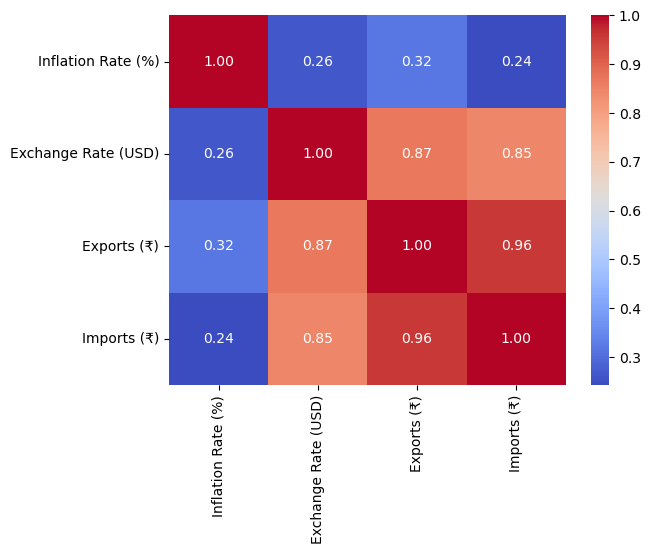

In [29]:
sns.heatmap(df[["Inflation Rate (%)",	"Exchange Rate (USD)",	"Exports (₹)",	"Imports (₹)"]].corr(), cmap = 'coolwarm', annot = True, fmt = ".2f")

In [31]:
X = df[['Exchange Rate (USD)', 'Inflation Rate (%)']]
y_ex = df['Exports (₹)']
y_im = df['Imports (₹)']

In [33]:
X_train,X_test,y_ex_train,y_ex_test = train_test_split(X,y_ex,test_size = 0.2,random_state = 42)
x_train,x_test,y_im_train,y_im_test = train_test_split(X,y_im,test_size = 0.2,random_state = 42)

In [35]:
lasso_ex = Lasso(alpha=1.0)
lasso_ex.fit(X_train, y_ex_train)
exports_pred = lasso_ex.predict(X_test)

In [37]:
exports_r2 = r2_score(y_ex_test, exports_pred)
exports_rmse = root_mean_squared_error(y_ex_test, exports_pred)
exports_intercept = lasso_ex.intercept_
exports_coefficients = lasso_ex.coef_

In [39]:
lasso_im = Lasso(alpha=1.0)
lasso_im.fit(x_train, y_im_train)
imports_pred = lasso_im.predict(x_test)

In [41]:
imports_r2 = r2_score(y_im_test, imports_pred)
imports_rmse = root_mean_squared_error(y_im_test, imports_pred)
imports_intercept = lasso_im.intercept_
imports_coefficients = lasso_im.coef_

In [43]:
results_df = pd.DataFrame({
    "Model": ["Lasso Exports", "Lasso Imports"],
    "Intercept": [exports_intercept, imports_intercept],
    "Exchange Rate Coeff": [exports_coefficients[0], imports_coefficients[0]],
    "Inflation Rate Coeff": [exports_coefficients[1], imports_coefficients[1]],
    "R² Score": [exports_r2, imports_r2],
    "RMSE": [exports_rmse, imports_rmse]
})

print(results_df)


           Model     Intercept  Exchange Rate Coeff  Inflation Rate Coeff  \
0  Lasso Exports -3.347960e+07         7.373774e+05         310161.972259   
1  Lasso Imports -5.694447e+07         1.234366e+06         -57463.307090   

   R² Score          RMSE  
0  0.784935  3.170670e+06  
1  0.736714  5.760256e+06  


In [87]:
styled_df2 = results_df.style.set_properties(**{
    'background-color': 'lightblue',
    'color': 'black',
    'border': '1px solid black',
    'text-align': 'center'
})
styled_df2

,Model,Intercept,Exchange Rate Coeff,Inflation Rate Coeff,R² Score,RMSE
0,Lasso Exports,-33479604.874791,737377.410072,310161.972259,0.784935,3170670.410070
1,Lasso Imports,-56944474.829643,1234365.812612,-57463.307090,0.736714,5760256.363533


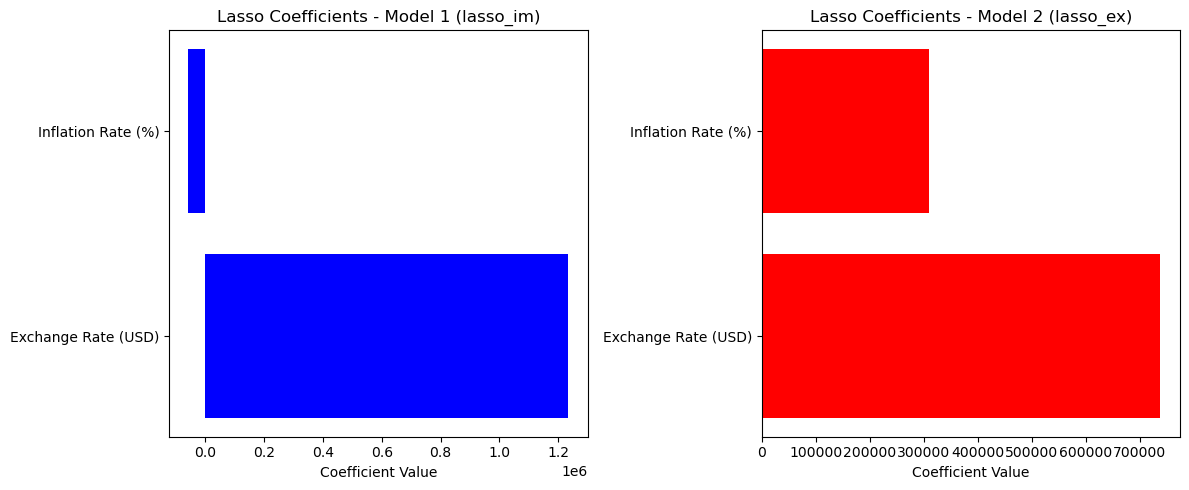

In [89]:
coefs_im = lasso_im.coef_
coefs_ex = lasso_ex.coef_
features = X_train.columns  # Assuming X_train is a DataFrame

# Plot the coefficients
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].barh(features, coefs_im, color='blue')
axes[0].set_title("Lasso Coefficients - Model 1 (lasso_im)")
axes[0].set_xlabel("Coefficient Value")

axes[1].barh(features, coefs_ex, color='red')
axes[1].set_title("Lasso Coefficients - Model 2 (lasso_ex)")
axes[1].set_xlabel("Coefficient Value")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Predicted Exports (In Millions)')

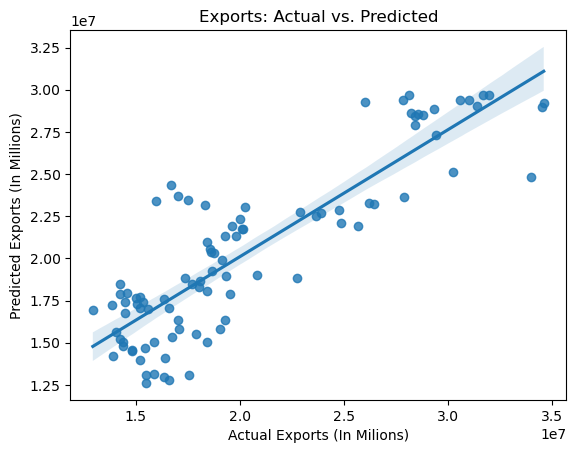

In [91]:
y_ex_pred = lasso_ex.predict(X_train)
sns.regplot(x=y_ex_train, y=y_ex_pred)
plt.title("Exports: Actual vs. Predicted")
plt.xlabel("Actual Exports (In Milions)")
plt.ylabel("Predicted Exports (In Millions)")

Text(0, 0.5, 'Predicted Imports (In Millions)')

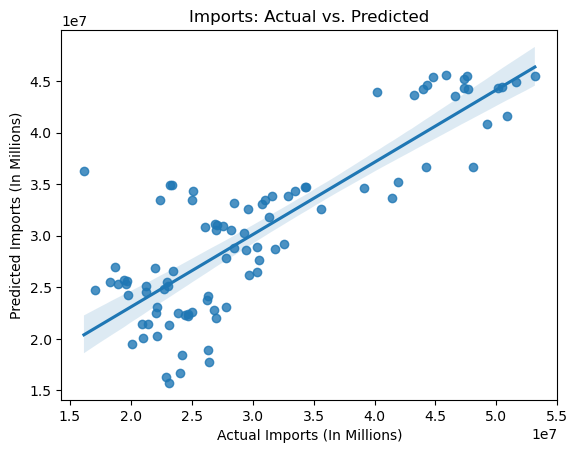

In [93]:
y_im_pred = lasso_im.predict(x_train)
sns.regplot(x=y_im_train, y=y_im_pred)
plt.title("Imports: Actual vs. Predicted")
plt.xlabel("Actual Imports (In Millions)")
plt.ylabel("Predicted Imports (In Millions)")